<a href="https://colab.research.google.com/github/hamant-jagwan/Online_Retail_Customer_Segmentation--ML--unsupervised_learning/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset
customer_df=pd.read_csv('/content/drive/MyDrive/project alma better /Online Retail.xlsx - Online Retail.csv')

In [4]:
#checking top 5 rows of dataset
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
#checking bottom 5 rows of dataset
customer_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


In [6]:
# checking shape of dataset
customer_df.shape


(541909, 8)

In [7]:
# basic information of dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**As we can see we have most of null values in customerID and all other columns look fine. we can drop those null values in customerID columns as we are making customer segmentation and keeping those null values make no sense**

In [8]:
#columns of dataset
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#**Data Cleaning**

**Checking for null values**

In [9]:
# checking for null values in dataset
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

***Here we have null values present in our dataset like in CustomerID and Description. we can drop those null values in customerID columns as we are making customer segmentation and keeping those null values make no sense***

In [10]:
# dropping null values
customer_df.dropna(inplace = True)

In [11]:
# Checking for missing values
customer_df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# checking info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [13]:
# checking shape
customer_df.shape

(406829, 8)

***After removing null value from our dataset.***

***Now we have 406829 rows and 8 columns in our dataset.***

In [14]:
# changing datatype
customer_df['InvoiceNo'] = customer_df['InvoiceDate'].astype('str')

In [15]:
customer_df = customer_df[~customer_df['InvoiceNo'].str.contains('C')]

***Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.***

In [16]:
customer_df.shape

(406829, 8)

In [17]:
# checking summary
customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Exploratory data analysis**

**Description Name**

In [18]:
Description_df = customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416


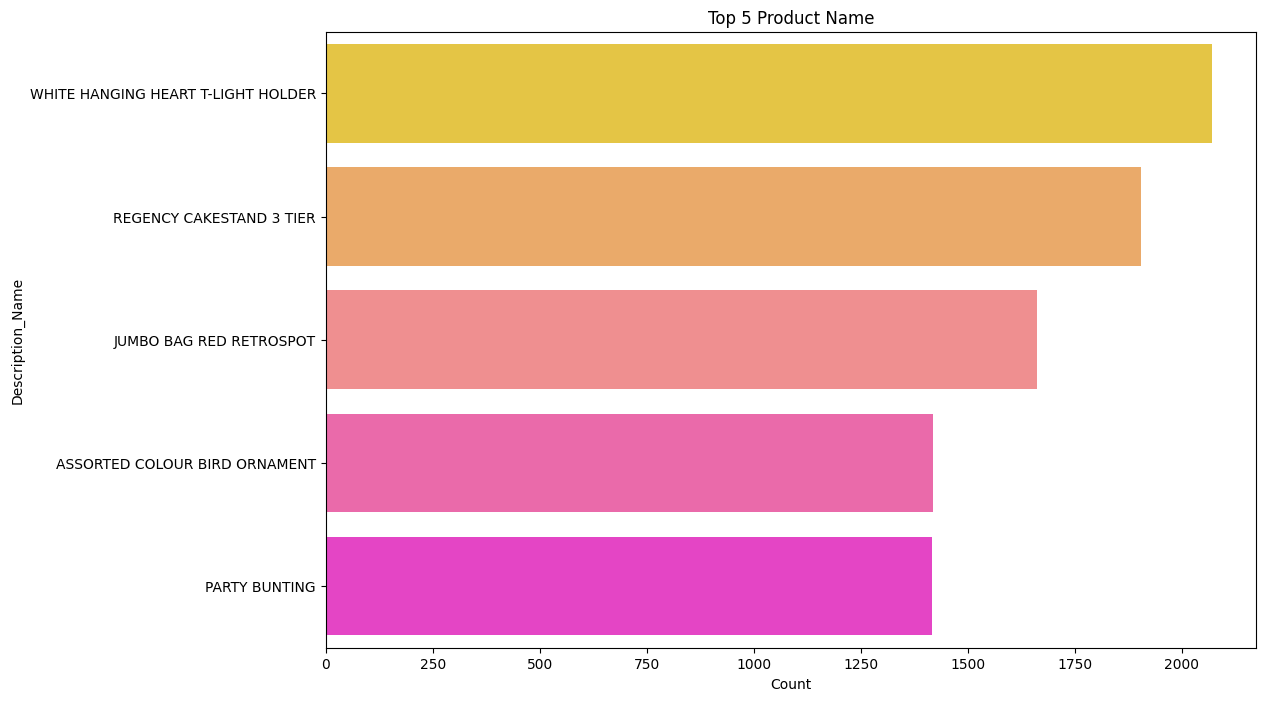

In [19]:
# plot top 5 product name
plt.figure(figsize = (12,8))
plt.title('Top 5 Product Name')
sns.barplot(x = 'Count', y = 'Description_Name', data = Description_df[:5], palette = 'spring_r');

### **Top product based on maximum selling are :**
1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

In [20]:
# bottom 5 description name
Description_df.tail()

,Description_Name,Count
3891,ANTIQUE RASPBERRY FLOWER EARRINGS,1
3892,"WALL ART,ONLY ONE PERSON",1
3893,GOLD/AMBER DROP EARRINGS W LEAF,1
3894,INCENSE BAZAAR PEACH,1
3895,PINK BAROQUE FLOCK CANDLE HOLDER,1



### **Bottom 5 Product based on the selling are:**
1. RUBY GLASS CLUSTER EARRINGS

2. PINK CHRYSANTHEMUMS ART FLOWER

3. 72 CAKE CASES VINTAGE CHRISTMAS

4. WALL ART , THE MAGIC FOREST

5. PAPER CRAFT , LITTLE BIRDIE

**StockCode Name**

In [21]:
StockCode_df = customer_df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns = {'index' : 'StockCode_Name'}, inplace = True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2077
1,22423,1905
2,85099B,1662
3,84879,1418
4,47566,1416


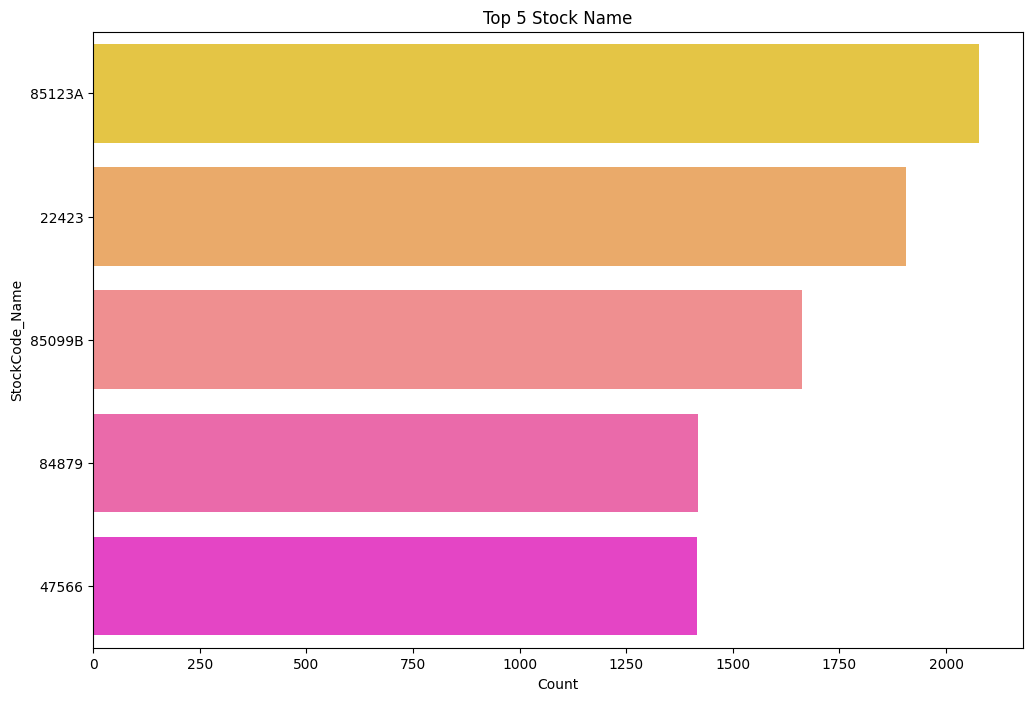

In [22]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='spring_r');

### **Top 5 Stock name based on selling are :**
1.85123A

2.22423

3.85099B

4.84879

5.4756

In [23]:
#bottom 5 stockcode name
StockCode_df.tail()

,StockCode_Name,Count
3679,84620,1
3680,90038B,1
3681,84551,1
3682,84614A,1
3683,20957,1


**Country Name**

In [24]:
country_df = customer_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
#top 5 country name
country_df.head()

,Country_Name,Count
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533


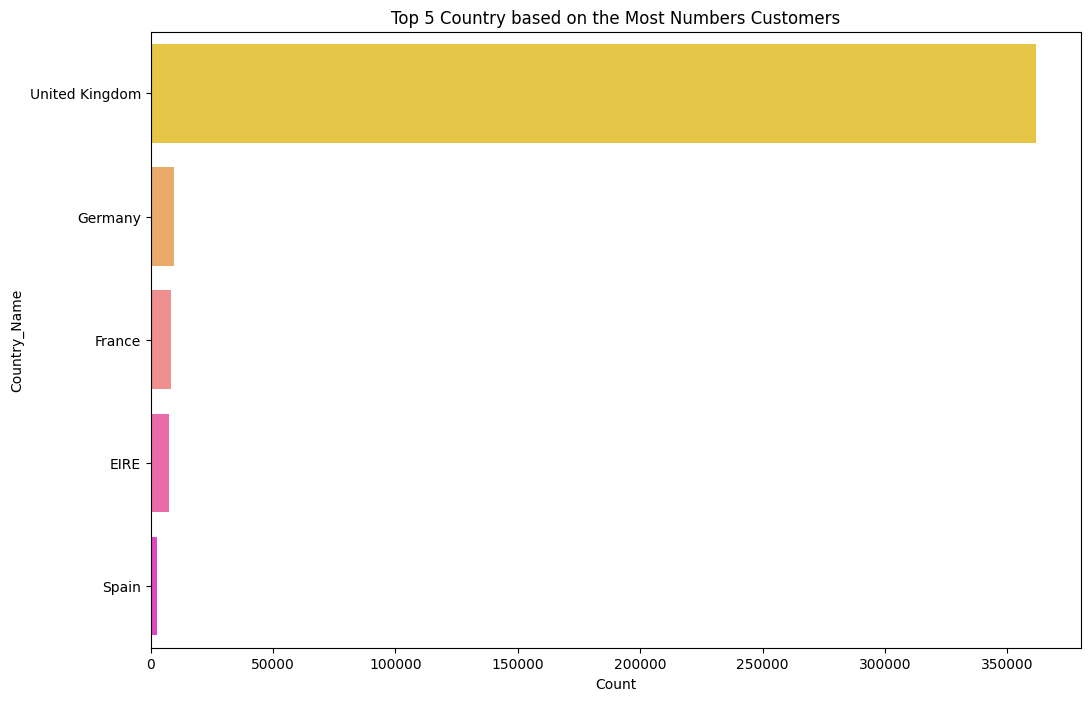

In [25]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[:5], palette='spring_r');

***From this graph we can see that most of the customers are from the United Kingdom which make sense as company is from UK bases after that we have Germany , France ,EIRE and Spain***

In [26]:
#bottom 5 country name
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,30
35,Bahrain,17
36,Saudi Arabia,10


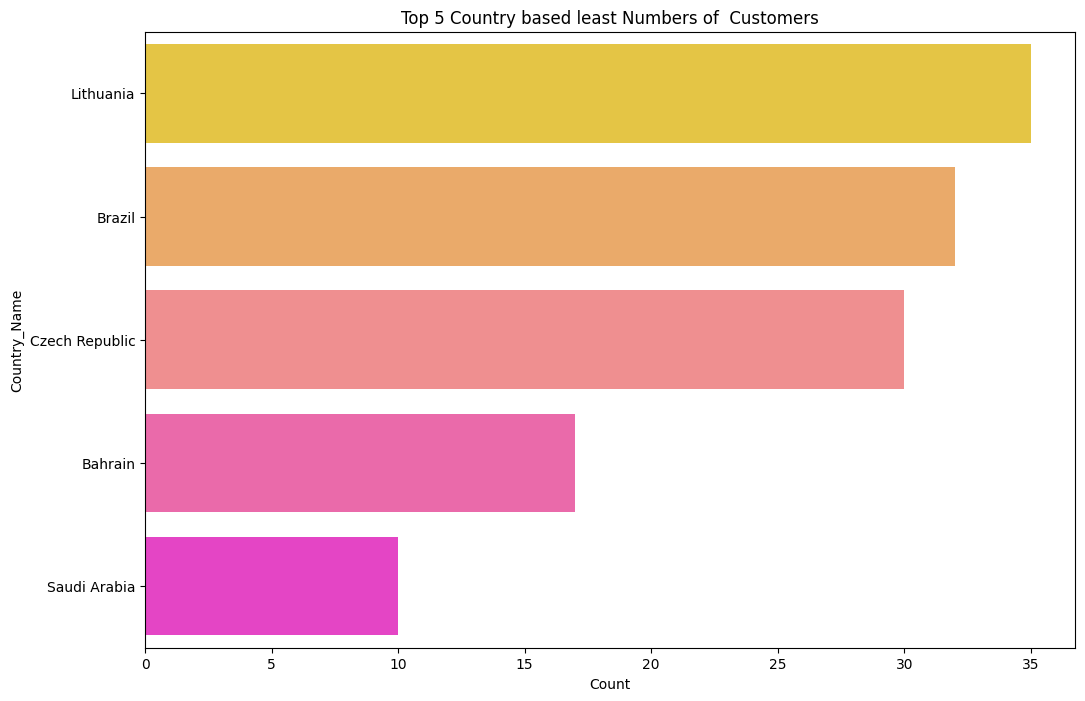

In [27]:
#plot bottom 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[-5:], palette='spring_r');

***From this graph we can see that least number of customers from Lithuania, Brazil, the Czech Republic , Bahrain and Saudi Arabia***

**Distribution of Quantity**

In [28]:
customer_df['Quantity'] = customer_df['Quantity'].apply(abs)


There is a typing error in the `Quantity` column. There is a minimum value of -80995 which is wrong because It is impossible to get negative Quantity

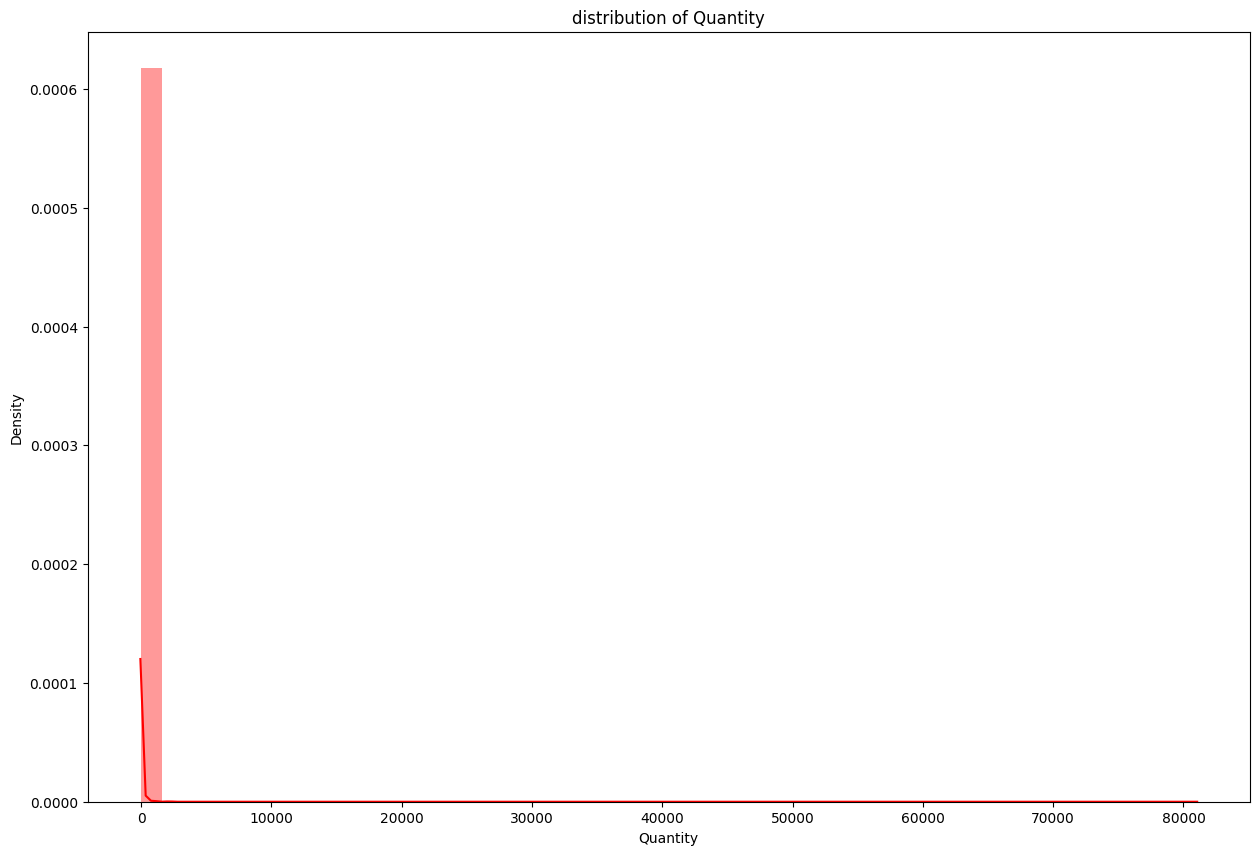

In [29]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(customer_df['Quantity'],color="r");

***Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution***

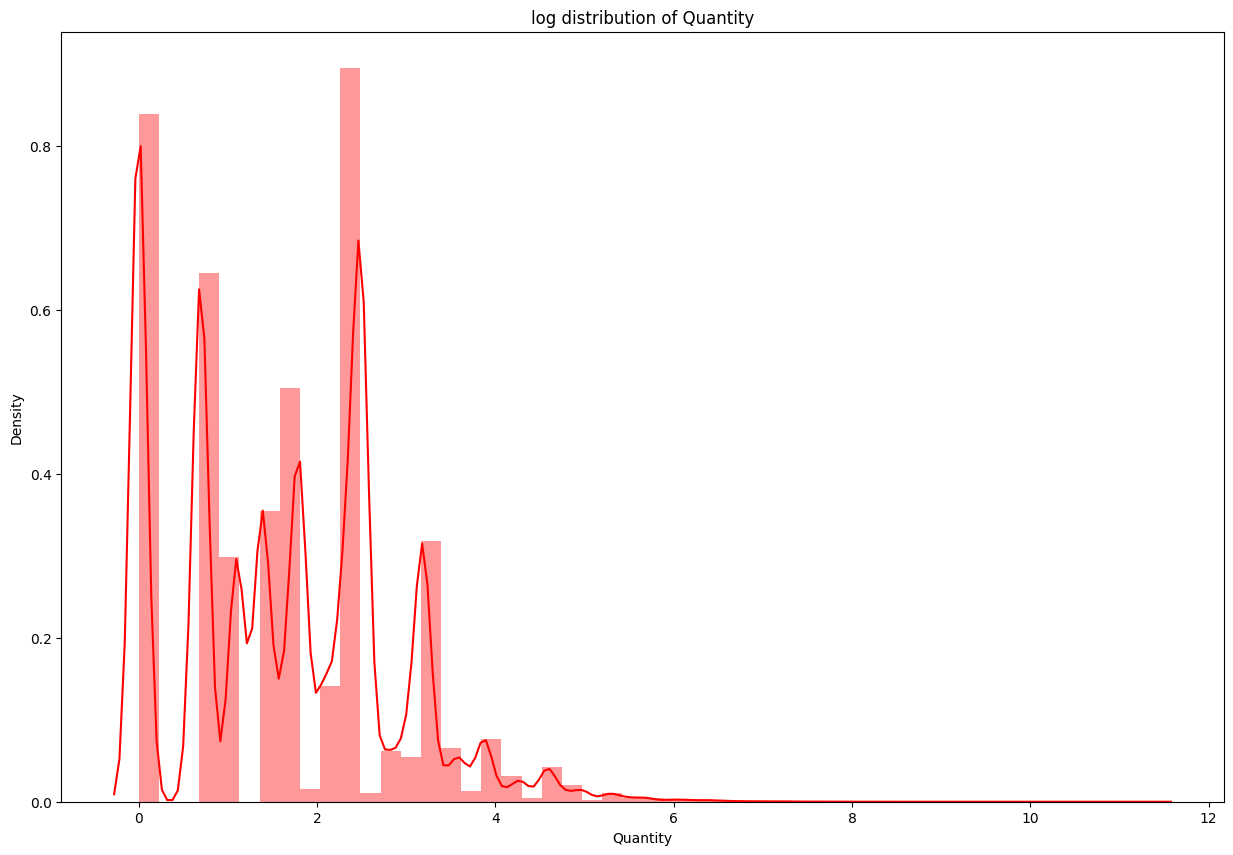

In [30]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(customer_df['Quantity']),color="r");

**Distribution of Unit Price**

<Axes: title={'center': 'UnitPrice distribution'}, xlabel='UnitPrice', ylabel='Density'>

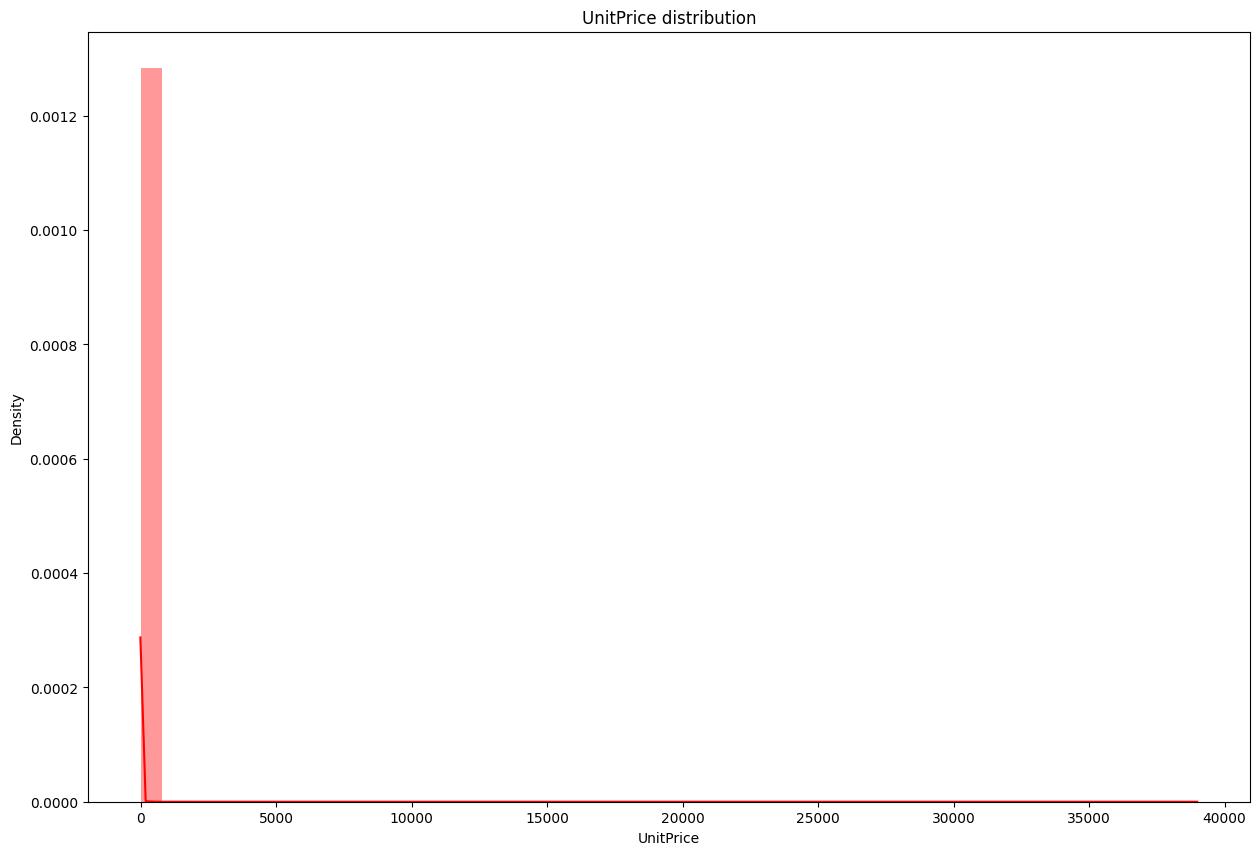

In [31]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(customer_df['UnitPrice'],color="r")

***From the distribution of unit price, we can say that most items have a lower price range.***

In [32]:
#checking for unit price less than 0
customer_df[customer_df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# **Feature engineering**

In [33]:
customer_df['InvoiceDate'].head(10)

0    12-01-2010 08:26
1    12-01-2010 08:26
2    12-01-2010 08:26
3    12-01-2010 08:26
4    12-01-2010 08:26
5    12-01-2010 08:26
6    12-01-2010 08:26
7    12-01-2010 08:28
8    12-01-2010 08:28
9    12-01-2010 08:34
Name: InvoiceDate, dtype: object

In [34]:
#Converting InvoiceDate columns into date time format
customer_df["InvoiceDate"] = pd.to_datetime(customer_df["InvoiceDate"])

In [35]:
#Creating a new features from Invoicedate
customer_df['Month'] = customer_df['InvoiceDate'].dt.month_name()
customer_df['Day'] = customer_df['InvoiceDate'].dt.day_name()
customer_df['Hour'] = customer_df['InvoiceDate'].dt.hour

In [36]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
customer_df['TotalAmount'] = customer_df['Quantity']*customer_df['UnitPrice']

In [37]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,TotalAmount
0,12-01-2010 08:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,12-01-2010 08:26,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,12-01-2010 08:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,12-01-2010 08:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,12-01-2010 08:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34


**Distribution of total amount**

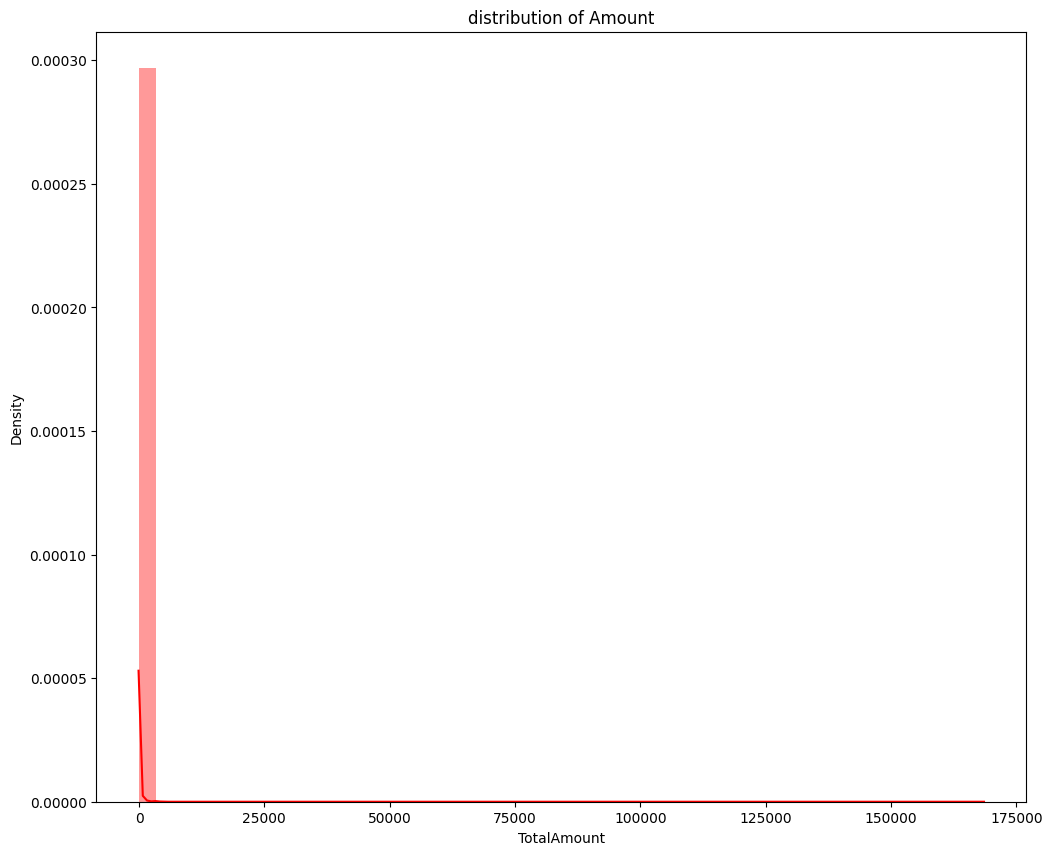

In [38]:
# checking distribution for Total amount
plt.figure(figsize = (12,10))
plt.title('distribution of Amount')
sns.distplot(customer_df['TotalAmount'], color = 'r');

**Months**

In [39]:
#creating month dataframe
month_df = customer_df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,65598
1,October,50695
2,December,44511
3,September,40822
4,May,28908
5,June,27836
6,March,27822
7,August,27662
8,July,27502
9,April,23198


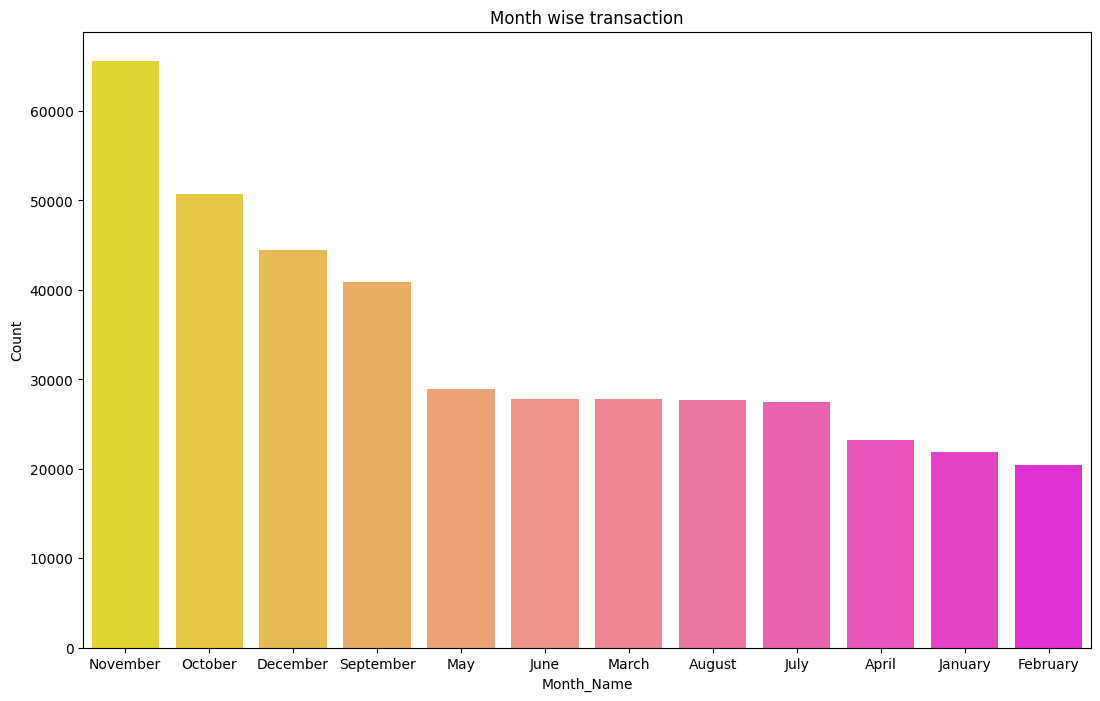

In [40]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

♦ ***Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.***

♦ ***Least numbers of purchasing are in the month of April and February.***

**Days**

In [41]:
#creating day dataframe
day_df = customer_df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,82374
1,Wednesday,70599
2,Tuesday,68110
3,Monday,66382
4,Sunday,63237
5,Friday,56127


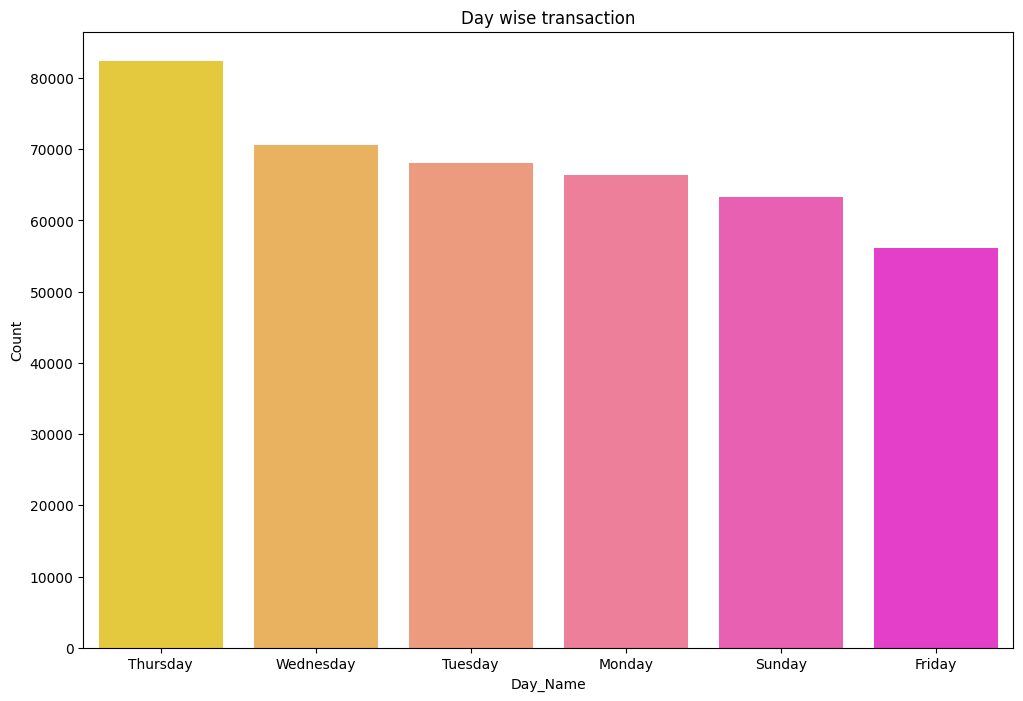

In [42]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

**We can see the maximum number of transactions are for Thursday but we can also see there are no transactions on Saturday at this point I have no idea why but there can be reasons probably data is not available for Saturdays or no transactions happened on Saturday.**

**Most of the customers purchased the items on Thursday, Wednesday and Tuesday.**

**Hour**

In [43]:
#Creating hour dataframe
hour_df = customer_df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

,Hours,Count
0,12,73342
1,13,65062
2,14,55075
3,11,50249
4,15,46220
5,10,38951
6,16,24997
7,9,22464
8,17,13734
9,8,8792


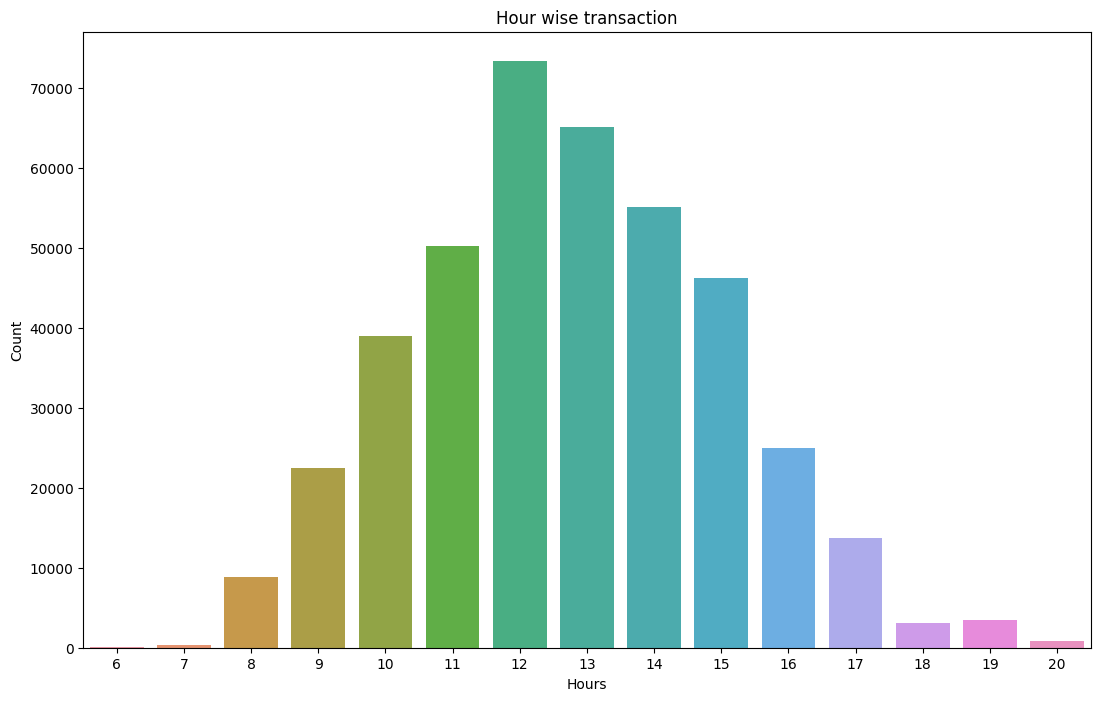

In [44]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

**From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.**

In [45]:
# dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return "Morning"
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return "Evening"

In [46]:
#applying function we created on hour column
customer_df['Time_type'] = customer_df['Hour'].apply(time_type)

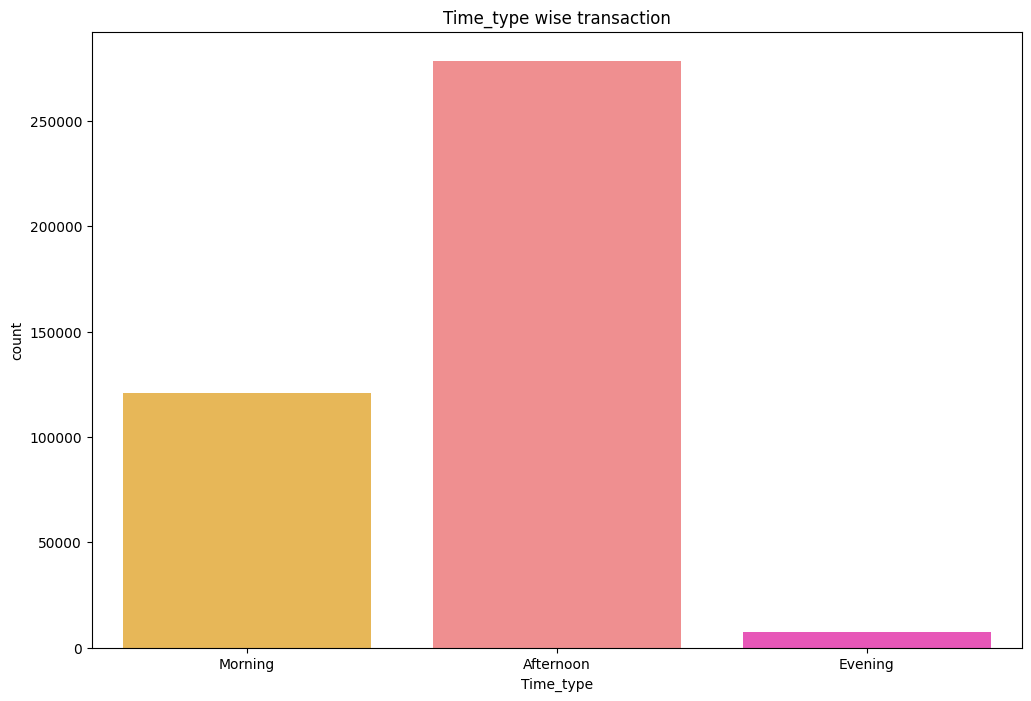

In [47]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=customer_df, palette='spring_r');

 ***Most of the customers have purchased the items in the Afternoon.***

***Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in the Evening.To increase transacction in the evening we can do one thing provide the offers/discounts at evening***

# **Create the RFM model (Recency, Frequency,Monetary value)**

### **RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.**

**RFM stands for the three dimensions:**

### **Recency – How recently did the customer purchase?**

### **Frequency – How often do they purchase?**

### **Monetary – How much do they spend?**

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [48]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,154367.20
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [49]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4372.000000
mean       91.581199
std       100.772139
min         0.000000
25%        16.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

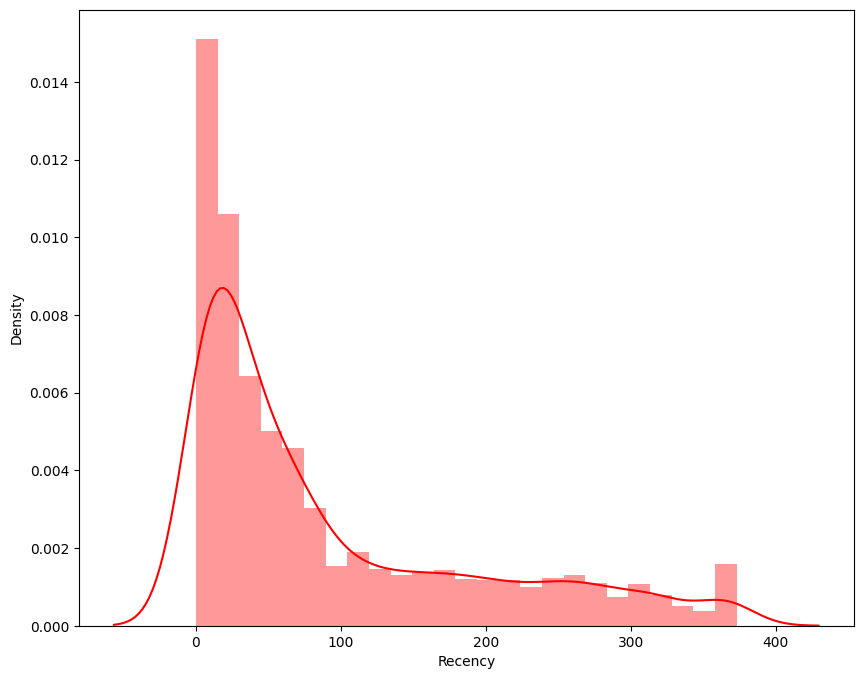

In [50]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [51]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: Frequency, dtype: float64

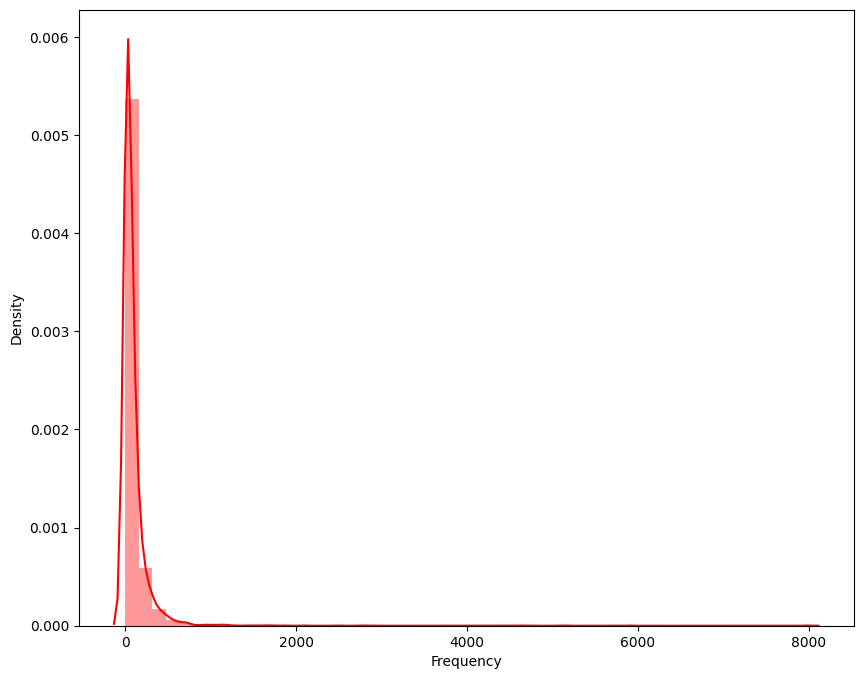

In [52]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [53]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4372.000000
mean       2178.122140
std       10502.255527
min           0.000000
25%         308.570000
50%         677.975000
75%        1696.285000
max      336942.100000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

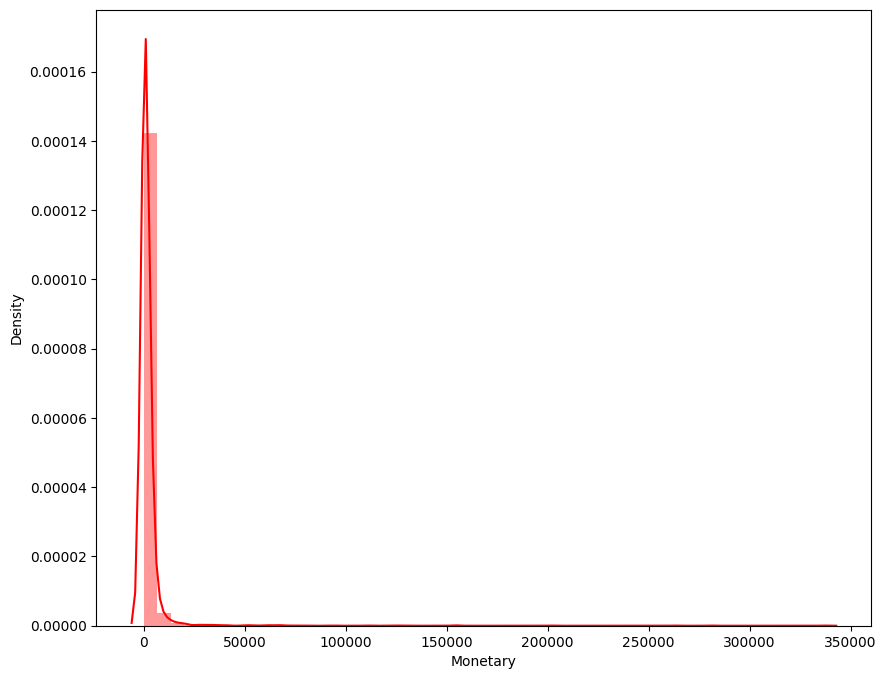

In [54]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

***From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.***


## **Splitting into four segments using quantiles.**

In [55]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [56]:
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Monetary': {0.25: 308.57, 0.5: 677.9750000000001, 0.75: 1696.2849999999999}}

In [57]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [58]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,2,154367.20,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [59]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,2,154367.20,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [60]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

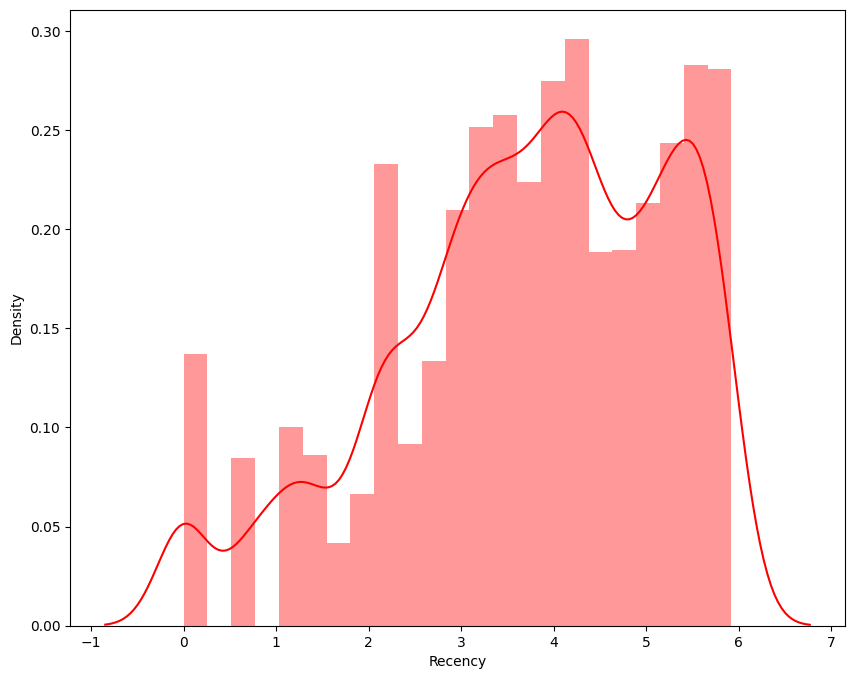

In [61]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r');

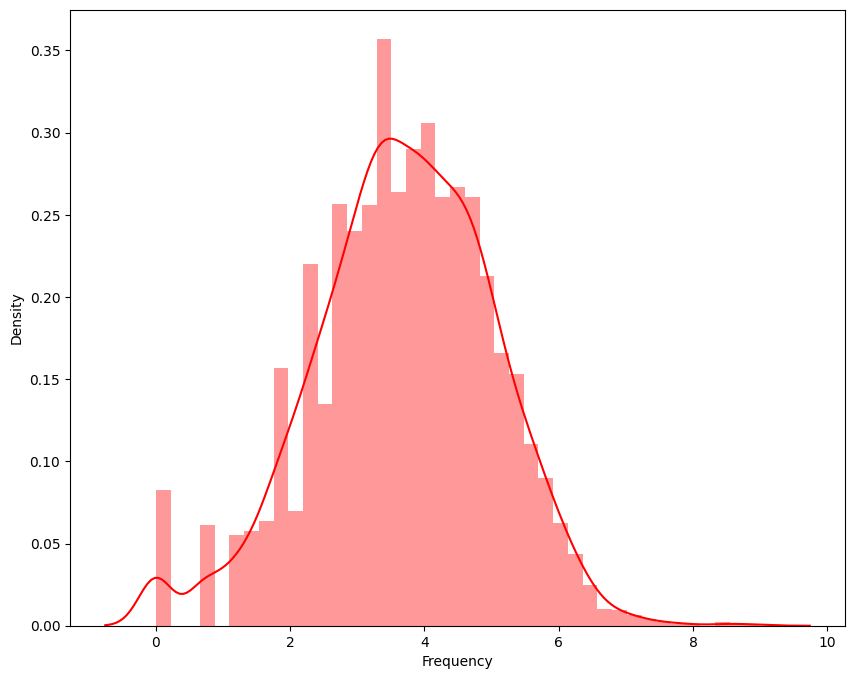

In [62]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r');

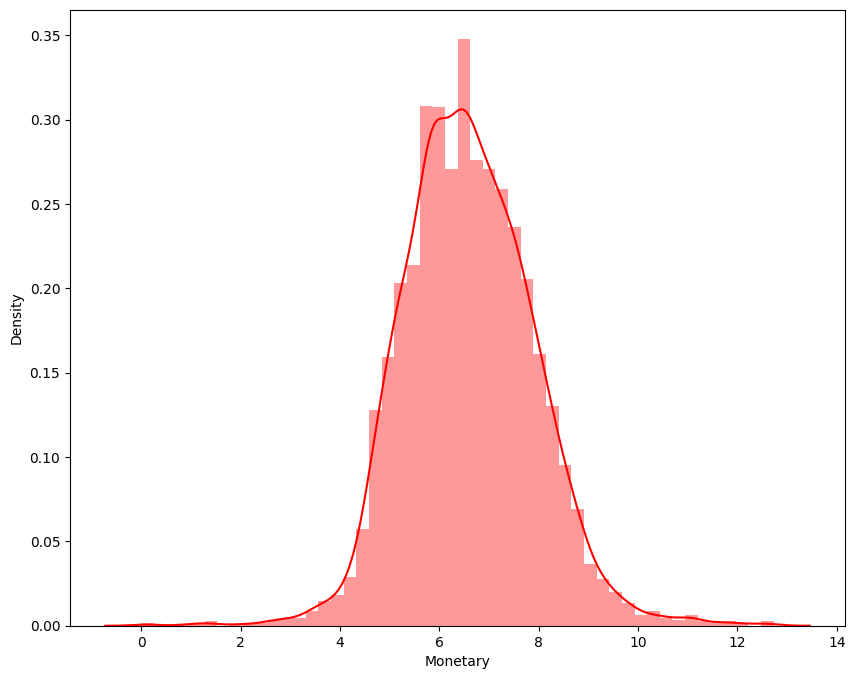

In [63]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

***As we can see from the above plots, skewness has been removed from the data.***

In [64]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **Clustering**

### **K-Means Clustering**

**Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.**

**KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method  can be used. These methods will help in selection of the optimum number of clusters.**

In [65]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

### **Silhouette score method:**

**Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.**

## **Applying Silhouette Score Method on Recency and Monetary**

In [66]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.421882566827495
For n_clusters = 3, silhouette score is 0.3423848231076239
For n_clusters = 4, silhouette score is 0.36220847900850955
For n_clusters = 5, silhouette score is 0.3312625958602156
For n_clusters = 6, silhouette score is 0.33811819833547396
For n_clusters = 7, silhouette score is 0.32637792561938744
For n_clusters = 8, silhouette score is 0.3365587283097307
For n_clusters = 9, silhouette score is 0.3417023569315943
For n_clusters = 10, silhouette score is 0.34477693574041984
For n_clusters = 11, silhouette score is 0.3468472665225455
For n_clusters = 12, silhouette score is 0.3362474622672898
For n_clusters = 13, silhouette score is 0.3446423836666749
For n_clusters = 14, silhouette score is 0.34360060502372564
For n_clusters = 15, silhouette score is 0.3483416246613835


### **Elbow Method:**

**Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.**

## **Applying Elbow Method on Recency and Monetary**

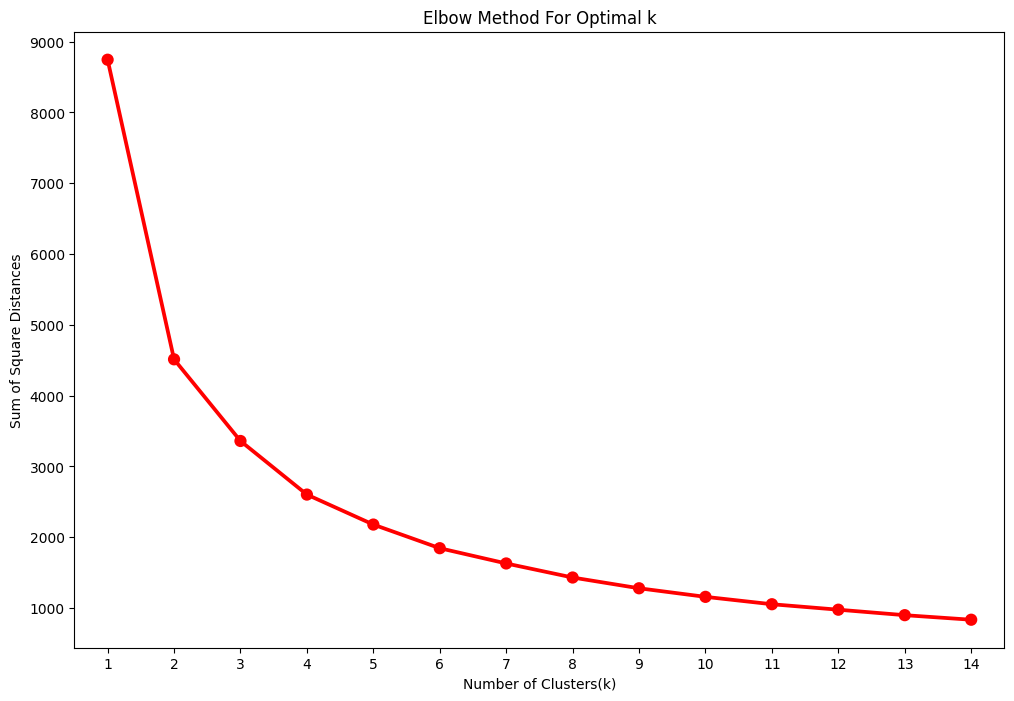

In [68]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

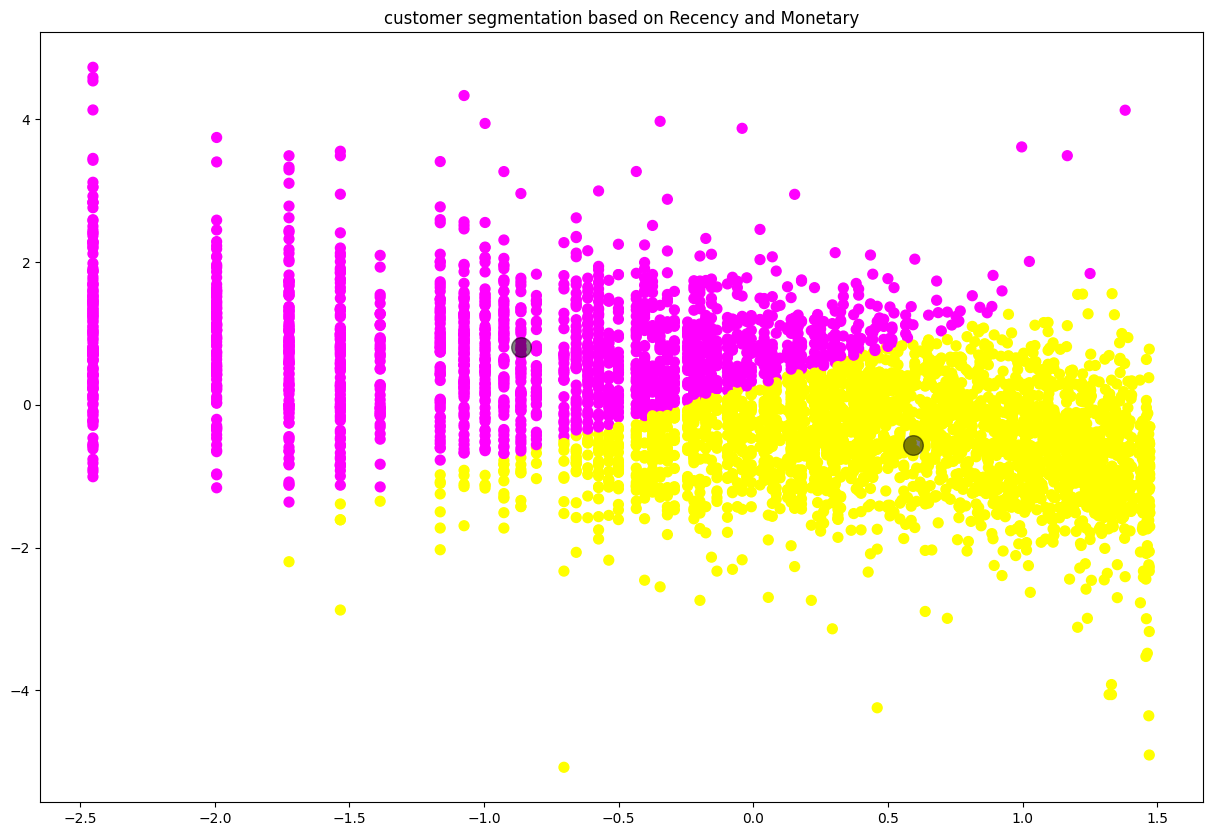

In [70]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

♦ ***Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.***

### **DBSCAN Clustering:**

**DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.**

## **Applying DBSCAN on Recency and Monetary**


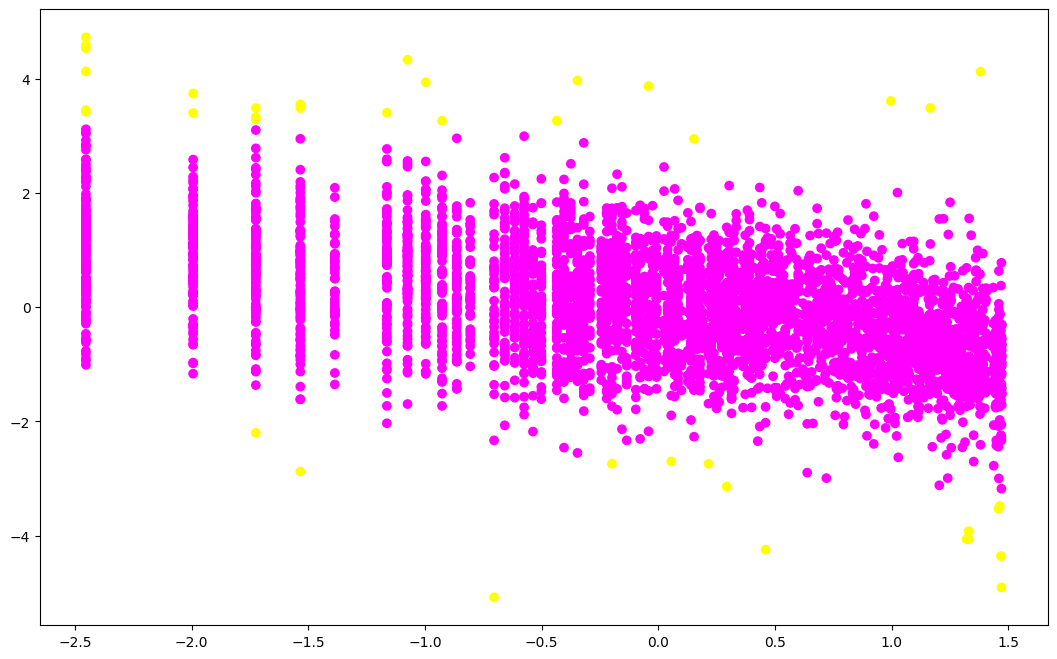

In [71]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');

♦ ***Here we can see that, Customers are separated when we cluster them by Recency and Monetary.***

## **Applying silhouette Score Method on Frequency and Monetary**

In [72]:
#silhouetee score
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4750156980181034
For n_clusters = 3, silhouette score is 0.4111307702680103
For n_clusters = 4, silhouette score is 0.37038103067862904
For n_clusters = 5, silhouette score is 0.3493777492382259
For n_clusters = 6, silhouette score is 0.3634932438549404
For n_clusters = 7, silhouette score is 0.3439279423970143
For n_clusters = 8, silhouette score is 0.35458698447925624
For n_clusters = 9, silhouette score is 0.3470136874680555
For n_clusters = 10, silhouette score is 0.34026284290570263
For n_clusters = 11, silhouette score is 0.34145458868559303
For n_clusters = 12, silhouette score is 0.35455291719920085
For n_clusters = 13, silhouette score is 0.3544578921277462
For n_clusters = 14, silhouette score is 0.3620740702237443
For n_clusters = 15, silhouette score is 0.341577659634972
